In [1]:
import gradinator as g
from gradinator import Tensor
import numpy as np

In [2]:
#To test the deriv, you can change the testfunc
import matplotlib.pyplot as plt

def testfunc(x):
    #x = Element(x)
    return (Tensor(np.e)**(x)) * g.sin(x*8)

def getxgrad(x):
    x = Tensor(x)
    testfunc(x).backprop()
    return x

def gethighergrad(x, order = 2):
    x = Tensor(x)
    testfunc(x).backprop()
    for i in range(order-1):
        y = x.grad
        y.flush_grads()
        y.backprop()
    return x.grad.value

range_lower = 0
range_upper = 2
step = 100

range_tuple = (int(range_lower*step),int(range_upper*step))

plt.plot([i/step for i in range(*range_tuple)],[(testfunc(Tensor(x/step)).value) for x in range(*range_tuple)], 'black')
grads = [(getxgrad(x/step).grad.value) for x in range(*range_tuple)]
plt.plot([i/step for i in range(*range_tuple)],grads, 'red')

grads_2 = [(gethighergrad(x/step,2)) for x in range(*range_tuple)]
plt.plot([i/step for i in range(*range_tuple)],grads_2, 'blue')

plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
x = np.ones((2,2,4)) *3
y = np.array([[1,2],[3,4],[5,6]])
print(x.shape)
print(np.transpose(x,axes=(0,2,1)).shape)
print(np.transpose(x))
print(y)
print(x.shape)
np.transpose(np.matmul(y, x))

(2, 2, 4)
(2, 4, 2)
[[[3. 3.]
  [3. 3.]]

 [[3. 3.]
  [3. 3.]]

 [[3. 3.]
  [3. 3.]]

 [[3. 3.]
  [3. 3.]]]
[[1 2]
 [3 4]
 [5 6]]
(2, 2, 4)


array([[[ 9.,  9.],
        [21., 21.],
        [33., 33.]],

       [[ 9.,  9.],
        [21., 21.],
        [33., 33.]],

       [[ 9.,  9.],
        [21., 21.],
        [33., 33.]],

       [[ 9.,  9.],
        [21., 21.],
        [33., 33.]]])

Tensor(shape: (), val: -2.1273337579063627, grad: 1, function: __mul__


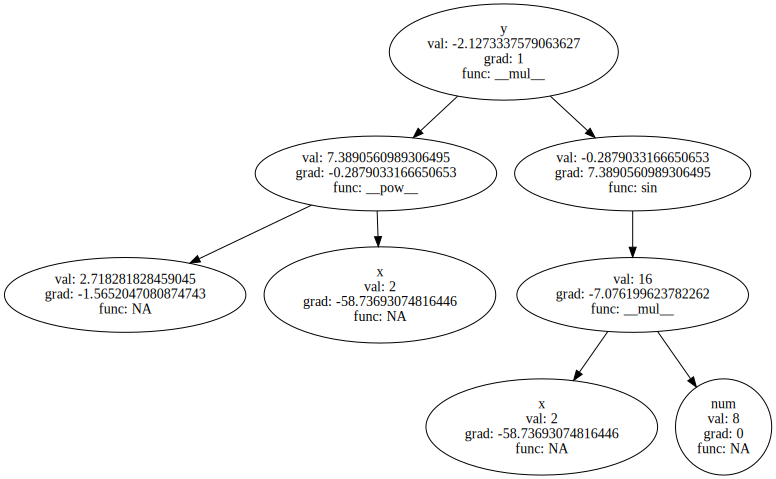

In [4]:
y = testfunc(Tensor(2,name='x'))
y.name='y'
y.backprop()
print(y)
#graph_print(traceback(y))
y.graph_visualize()

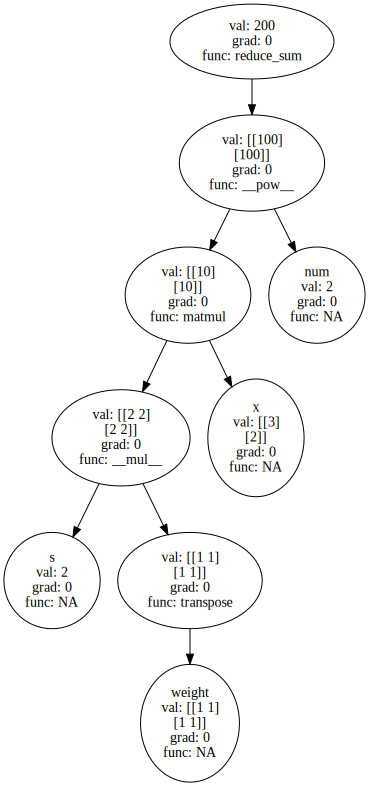

In [15]:
w = Tensor([[1,1],[1,1]],name = 'weight')
x = Tensor([[3],[2]],name = 'x')
s = Tensor(2,name='s')

z = g.reduce_sum(g.matmul(s*g.transpose(w),x) ** 2)
z.graph_visualize()

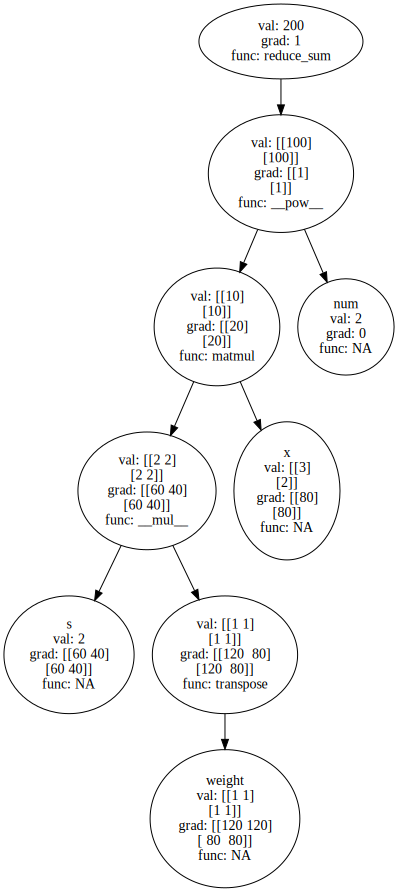

In [18]:
z.backprop()
z.graph_visualize()

#graph_visualize(w.grad)

In [17]:
z.flush_grads()